# 图像的数组表示

## 图像的RGB色彩模式

图像中的每个像素点由红(R)，绿(G)，蓝(B)叠加组成：

+ R红色，取值范围，0-255
+ G绿色，取值范围，0-255
+ B蓝色，取值范围，0-255

RGB形成的颜色包括了人类视力所能感知的所有颜色，所以在计算机中，一般的图片都采用RGB色彩



## `PIL`库

`PIL`，Python Image Library

`PIL`库是一个具有强大图像处理能力的第三方库

在命令行下的安装方法：`pip install pillow`

这里需要注意，在安装的时候，库的名称是`pillow`而在实际使用的时候，需要调用`PIL`库



### 使用`PIL`库

```python
>>> from PIL import Image
```

`Image`类是`PIL`库中代表一个图像的类（对象），一个`Image`对象就代表一个图像



## 图像的数组表示

图像是一个由像素组成的二维矩阵，每个元素是一个RGB值

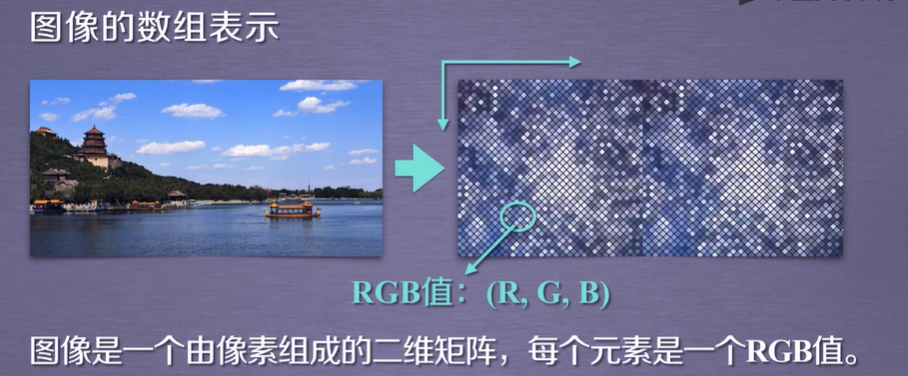

在RGB中每一个元素是一个字节，共有3个字节，因此，一个图像是由3个字节作为元素形成的一个二维矩阵

可以使用`NumPy`的数组来表示图像

使用`Image`对象来表示图像，使用`NumPy`的数组来表示图像中的每一个元素




In [2]:
from PIL import Image
import numpy as np

# 图像的变换

## 流程

读入图像后，获取像素RGB值，修改后保存为新的文件


In [4]:
a = np.array(Image.open("69181733d0a3ac8a33965783ee4fef2.jpg"))
print(a.shape,a.dtype)

(518, 536, 3) uint8


In [6]:
b = [255,255,255] - a  #对像素进行取反运算
im = Image.fromarray(b.astype('uint8'))
im.save("gero.jpg")

In [10]:
f = np.array(Image.open("69181733d0a3ac8a33965783ee4fef2.jpg").convert('L'))
x = 255 - f
im = Image.fromarray(x.astype('uint8'))
im.save("gero2.jpg")

# “图像的手绘效果”实例分析

## 分析图像手绘效果的特点

+ 手绘图通常是黑白灰的图片
+ 边界线条较重，轮廓部分
+ 相同或相近色彩偏白色，蓝天白云，蓝天部分是白色
+ 手绘效果略有光源效果


In [17]:
a = np.array(Image.open('69181733d0a3ac8a33965783ee4fef2.jpg').convert('L')).astype('float') 

depth = 10.
grad = np.gradient(a)
grad_x, grad_y = grad
grad_x = grad_x*depth/100.
grad_y = grad_y*depth/100.

vec_el = np.pi/2.2
vec_az = np.pi/4.
dx = np.cos(vec_el)*np.cos(vec_az)
dy = np.cos(vec_el)*np.sin(vec_az)
dz = np.sin(vec_el)

A = np.sqrt(grad_x**2 + grad_y**2 + 1.)
uni_x = grad_x/A
uni_y = grad_y/A
uni_z = 1./A

b = 255*(dx*uni_x + dy*uni_y + dz*uni_z)
b = b.clip(0,255)

im = Image.fromarray(b.astype('uint8')) 	
im.save("gero3.jpg")